# Лабораторная работа 2

# Выполнил: Шиширин В.Н., М8О-310Б-23

## 1. Импорт библиотек

In [94]:
# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Библиотеки для предобработки данных
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Метрики
from sklearn.metrics import (roc_auc_score, roc_curve, classification_report, 
                             confusion_matrix, precision_score, recall_score, 
                             f1_score, accuracy_score, average_precision_score)

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

## 2. Загрузка данных

In [95]:
# Загружаем данные
train_df = pd.read_csv('dataset/train_c.csv')
test_df = pd.read_csv('dataset/test_c.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\nПервые 5 строк обучающей выборки:")
train_df.head()

Размер обучающей выборки: (11017, 35)
Размер тестовой выборки: (5000, 35)

Первые 5 строк обучающей выборки:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


## 3. Разведочный анализ данных (EDA)

### 3.1 Информация о датасете

In [96]:
# Информация о типах данных и пропусках
print("=" * 80)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 80)
train_df.info()

print("\n" + "=" * 80)
print("СТАТИСТИКА ПО ЧИСЛОВЫМ ПРИЗНАКАМ")
print("=" * 80)
train_df.describe()

ИНФОРМАЦИЯ О ДАТАСЕТЕ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToInc

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000


### 3.2 Распределение целевой переменной

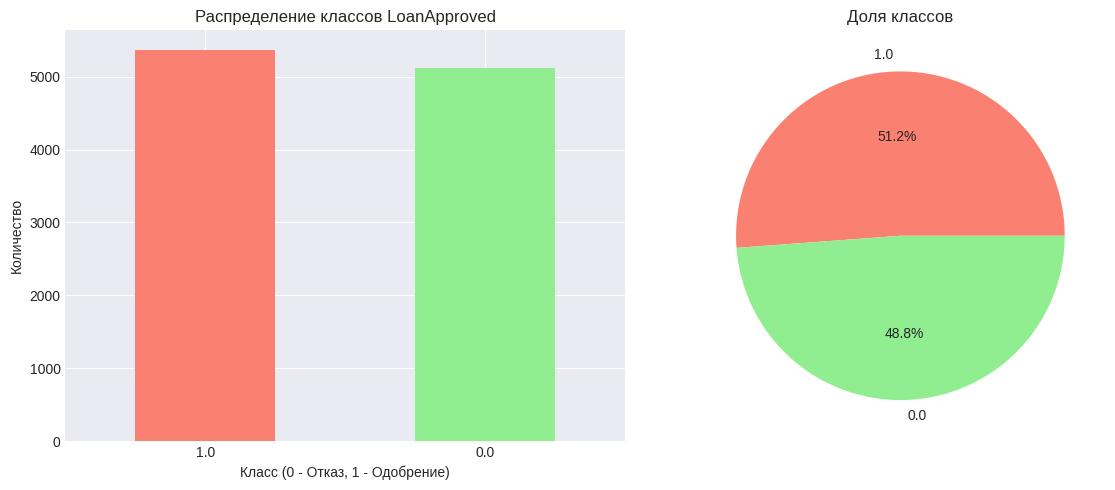

Распределение целевой переменной:
LoanApproved
1.0    5367
0.0    5120
Name: count, dtype: int64

Процентное соотношение:
LoanApproved
1.0    51.177649
0.0    48.822351
Name: proportion, dtype: float64


In [97]:
# Анализ распределения целевой переменной
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_df['LoanApproved'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Распределение классов LoanApproved')
plt.xlabel('Класс (0 - Отказ, 1 - Одобрение)')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train_df['LoanApproved'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'lightgreen'])
plt.title('Доля классов')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Распределение целевой переменной:")
print(train_df['LoanApproved'].value_counts())
print(f"\nПроцентное соотношение:")
print(train_df['LoanApproved'].value_counts(normalize=True) * 100)

### 3.3 Анализ пропущенных значений

In [98]:
# Подсчет пропусков
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_data = pd.DataFrame({
    'Train Missing': missing_train[missing_train > 0],
    'Train %': (missing_train[missing_train > 0] / len(train_df) * 100).round(2),
    'Test Missing': missing_test[missing_test > 0],
    'Test %': (missing_test[missing_test > 0] / len(test_df) * 100).round(2)
})

if len(missing_data) > 0:
    print("Признаки с пропущенными значениями:")
    print(missing_data.sort_values('Train Missing', ascending=False))
else:
    print("Пропущенных значений не обнаружено!")

Признаки с пропущенными значениями:
                            Train Missing  Train %  Test Missing  Test %
CheckingAccountBalance               1031     9.36           NaN     NaN
BaseInterestRate                     1031     9.36           NaN     NaN
BankruptcyHistory                    1031     9.36           NaN     NaN
TotalAssets                          1031     9.36           NaN     NaN
NetWorth                             1031     9.36           NaN     NaN
MonthlyDebtPayments                  1031     9.36           NaN     NaN
CreditScore                          1031     9.36           NaN     NaN
LoanAmount                           1031     9.36           NaN     NaN
LoanPurpose                          1031     9.36           NaN     NaN
Age                                   530     4.81           NaN     NaN
AnnualIncome                          530     4.81           NaN     NaN
ApplicationDate                       530     4.81           NaN     NaN
Experience     

## 4. Реализация собственных метрик

### 4.1 Реализация метрик качества

In [99]:
# Реализация собственных метрик для оценки качества классификации

def my_accuracy(y_true, y_pred):
    """
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def my_precision(y_true, y_pred):
    """
    Precision = TP / (TP + FP)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    
    if tp + fp == 0:
        return 0.0
    return tp / (tp + fp)

def my_recall(y_true, y_pred):
    """
    Recall = TP / (TP + FN)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    if tp + fn == 0:
        return 0.0
    return tp / (tp + fn)

def my_f1_score(y_true, y_pred):
    """
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    """
    precision = my_precision(y_true, y_pred)
    recall = my_recall(y_true, y_pred)
    
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def my_roc_auc(y_true, y_proba):
    """
    ROC-AUC вычисляется методом трапеций
    """
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)
    
    # Сортировка по вероятностям
    desc_score_indices = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[desc_score_indices]
    
    # Вычисление TPR и FPR
    tps = np.cumsum(y_true_sorted)
    fps = np.cumsum(1 - y_true_sorted)
    
    total_positives = tps[-1]
    total_negatives = fps[-1]
    
    if total_positives == 0 or total_negatives == 0:
        return 0.5
    
    tpr = tps / total_positives
    fpr = fps / total_negatives
    
    tpr = np.concatenate(([0], tpr))
    fpr = np.concatenate(([0], fpr))
    
    auc = np.trapz(tpr, fpr)
    
    return auc

def my_pr_auc(y_true, y_proba):
    """
    PR-AUC (Precision-Recall AUC)
    """
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)
    
    desc_score_indices = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[desc_score_indices]
    
    tps = np.cumsum(y_true_sorted)
    fps = np.cumsum(1 - y_true_sorted)
    
    total_positives = np.sum(y_true)
    
    if total_positives == 0:
        return 0.0
    
    precisions = tps / (tps + fps)
    recalls = tps / total_positives
    
    precisions = np.concatenate(([1], precisions))
    recalls = np.concatenate(([0], recalls))
    
    auc = np.trapz(precisions, recalls)
    
    return auc


### 4.2 Тестирование метрик

In [100]:
# Тестирование собственных метрик
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

np.random.seed(42)
y_test_example = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])
y_pred_example = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1])
y_proba_example = np.array([0.9, 0.1, 0.8, 0.4, 0.2, 0.85, 0.6, 0.3, 0.75, 0.95])

print("=" * 60)
print("ТЕСТИРОВАНИЕ МЕТРИК")
print("=" * 60)

# Accuracy
my_acc = my_accuracy(y_test_example, y_pred_example)
sk_acc = accuracy_score(y_test_example, y_pred_example)
print(f"\nAccuracy:")
print(f"  Моя реализация:  {my_acc:.4f}")
print(f"  sklearn:         {sk_acc:.4f}")
print(f"  Совпадение: {np.isclose(my_acc, sk_acc)}")

# Precision
my_prec = my_precision(y_test_example, y_pred_example)
sk_prec = precision_score(y_test_example, y_pred_example)
print(f"\nPrecision:")
print(f"  Моя реализация:  {my_prec:.4f}")
print(f"  sklearn:         {sk_prec:.4f}")
print(f"  Совпадение: {np.isclose(my_prec, sk_prec)}")

# Recall
my_rec = my_recall(y_test_example, y_pred_example)
sk_rec = recall_score(y_test_example, y_pred_example)
print(f"\nRecall:")
print(f"  Моя реализация:  {my_rec:.4f}")
print(f"  sklearn:         {sk_rec:.4f}")
print(f"  Совпадение: {np.isclose(my_rec, sk_rec)}")

# F1-score
my_f1 = my_f1_score(y_test_example, y_pred_example)
sk_f1 = f1_score(y_test_example, y_pred_example)
print(f"\nF1-score:")
print(f"  Моя реализация:  {my_f1:.4f}")
print(f"  sklearn:         {sk_f1:.4f}")
print(f"  Совпадение: {np.isclose(my_f1, sk_f1)}")

# ROC-AUC
my_roc = my_roc_auc(y_test_example, y_proba_example)
sk_roc = roc_auc_score(y_test_example, y_proba_example)
print(f"\nROC-AUC:")
print(f"  Моя реализация:  {my_roc:.4f}")
print(f"  sklearn:         {sk_roc:.4f}")
print(f"  Совпадение: {np.isclose(my_roc, sk_roc)}")

# PR-AUC
my_pr = my_pr_auc(y_test_example, y_proba_example)
sk_pr = average_precision_score(y_test_example, y_proba_example)
print(f"\nPR-AUC:")
print(f"  Моя реализация:  {my_pr:.4f}")
print(f"  sklearn:         {sk_pr:.4f}")
print(f"  Совпадение: {np.isclose(my_pr, sk_pr, atol=0.01)}")

ТЕСТИРОВАНИЕ МЕТРИК

Accuracy:
  Моя реализация:  0.8000
  sklearn:         0.8000
  Совпадение: True

Precision:
  Моя реализация:  0.8333
  sklearn:         0.8333
  Совпадение: True

Recall:
  Моя реализация:  0.8333
  sklearn:         0.8333
  Совпадение: True

F1-score:
  Моя реализация:  0.8333
  sklearn:         0.8333
  Совпадение: True

ROC-AUC:
  Моя реализация:  0.9583
  sklearn:         0.9583
  Совпадение: True

PR-AUC:
  Моя реализация:  0.9742
  sklearn:         0.9762
  Совпадение: True


## 5. Реализация Bagging

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

class MyBaggingClassifier:
    """
    Реализация бэггинга с бутстреп-выборками
    """
    
    def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        
    def fit(self, X, y):
        """
        Обучение n моделей на бутстреп-выборках
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        
        for i in range(self.n_estimators):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]
            
            from sklearn.base import clone
            model = clone(self.base_estimator)
            model.fit(X_bootstrap, y_bootstrap)
            self.models.append(model)
        
        return self
    
    def predict(self, X):
        """
        Предсказание через мажоритарное голосование
        """
        predictions = np.array([model.predict(X) for model in self.models])
        return np.round(np.mean(predictions, axis=0)).astype(int)
    
    def predict_proba(self, X):
        """
        Усредненные вероятности
        """
        probas = np.array([model.predict_proba(X) for model in self.models])
        return np.mean(probas, axis=0)

## 6. Реализация Gradient Boosting

In [102]:
from sklearn.tree import DecisionTreeRegressor

class MyGradientBoostingClassifier:
    """
    Реализация градиентного бустинга для бинарной классификации
    """
    
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.init_prediction = None
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def fit(self, X, y):
        """
        Обучение n деревьев на градиентах
        """
        y_array = y.values if hasattr(y, 'values') else y
        
        # Инициализация
        p = np.mean(y_array)
        self.init_prediction = np.log(p / (1 - p + 1e-10))
        
        current_predictions = np.full(len(y_array), self.init_prediction)
        
        for i in range(self.n_estimators):
            probabilities = self._sigmoid(current_predictions)
            residuals = y_array - probabilities
            
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state + i if self.random_state else None
            )
            tree.fit(X, residuals)
            
            predictions = tree.predict(X)
            current_predictions += self.learning_rate * predictions
            
            self.models.append(tree)
        
        return self
    
    def _predict_raw(self, X):
        predictions = np.full(X.shape[0], self.init_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions
    
    def predict_proba(self, X):
        raw_predictions = self._predict_raw(X)
        proba_class_1 = self._sigmoid(raw_predictions)
        proba_class_0 = 1 - proba_class_1
        return np.column_stack([proba_class_0, proba_class_1])
    
    def predict(self, X):
        probas = self.predict_proba(X)[:, 1]
        return (probas >= 0.5).astype(int)

### 6.1 Сравнение с другими библиотеками

In [103]:
# Сохраняем ID для тестовой выборки
test_ids = test_df['ID'] if 'ID' in test_df.columns else test_df.index

# Отделяем целевую переменную и сбрасываем индекс
y_train = train_df['LoanApproved'].reset_index(drop=True)

# Удаляем ненужные колонки из обучающей выборки
X_train = train_df.drop(['LoanApproved'], axis=1).reset_index(drop=True)

# Для тестовой выборки
X_test = test_df.copy().reset_index(drop=True)

# Удаляем ID из признаков, если он есть
if 'ID' in X_train.columns:
    X_train = X_train.drop('ID', axis=1)
if 'ID' in X_test.columns:
    X_test = X_test.drop('ID', axis=1)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}")

Размер X_train: (11017, 34)
Размер y_train: (11017,)
Размер X_test: (5000, 34)


## 7. Предобработка данных

### 7.1 Кодирование категориальных признаков

In [104]:
# Находим категориальные признаки
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_features}")

# Применяем Label Encoding к категориальным признакам
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    # Объединяем train и test для корректного кодирования
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined.astype(str))
    
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    
    label_encoders[col] = le

print(f"\nЗакодировано {len(categorical_features)} признаков.")

Категориальные признаки: ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

Закодировано 6 признаков.


### 7.2 Обработка даты

In [105]:
# Проверяем наличие колонки с датой
if 'ApplicationDate' in X_train.columns:
    # Преобразуем в datetime
    X_train['ApplicationDate'] = pd.to_datetime(X_train['ApplicationDate'])
    X_test['ApplicationDate'] = pd.to_datetime(X_test['ApplicationDate'])
    
    # Извлекаем признаки
    for df in [X_train, X_test]:
        df['Application_Year'] = df['ApplicationDate'].dt.year
        df['Application_Month'] = df['ApplicationDate'].dt.month
        df['Application_Day'] = df['ApplicationDate'].dt.day
        df['Application_DayOfWeek'] = df['ApplicationDate'].dt.dayofweek
        df['Application_Quarter'] = df['ApplicationDate'].dt.quarter
    
    # Удаляем исходную колонку с датой
    X_train = X_train.drop('ApplicationDate', axis=1)
    X_test = X_test.drop('ApplicationDate', axis=1)
    
    print("Признаки из даты успешно извлечены!")
else:
    print("Колонка ApplicationDate не найдена")

Признаки из даты успешно извлечены!


### 7.3 Feature Engineering

In [106]:
# Создаем дополнительные признаки для обеих выборок
for df in [X_train, X_test]:
    # Отношение кредита к доходу
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df['LoanToIncome'] = df['LoanAmount'] / (df['AnnualIncome'] + 1)
    
    # Отношение активов к обязательствам
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df['AssetToLiability'] = df['TotalAssets'] / (df['TotalLiabilities'] + 1)
    
    # Чистый доход после долгов
    if 'MonthlyIncome' in df.columns and 'MonthlyDebtPayments' in df.columns:
        df['NetMonthlyIncome'] = df['MonthlyIncome'] - df['MonthlyDebtPayments']
    
    # Общая финансовая нагрузка
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyDebtPayments' in df.columns:
        df['TotalMonthlyPayments'] = df['MonthlyLoanPayment'] + df['MonthlyDebtPayments']
    
    # Отношение сбережений к доходу
    if 'SavingsAccountBalance' in df.columns and 'MonthlyIncome' in df.columns:
        df['SavingsToIncome'] = df['SavingsAccountBalance'] / (df['MonthlyIncome'] * 12 + 1)

print(f"Новый размер X_train: {X_train.shape}")
print(f"Новый размер X_test: {X_test.shape}")
print(f"Добавлено новых признаков: {X_train.shape[1] - len(X_train.columns) + 5}")

Новый размер X_train: (11017, 43)
Новый размер X_test: (5000, 43)
Добавлено новых признаков: 5


### 7.4 Масштабирование

In [107]:
# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Сохраняем названия признаков
feature_names = X_train.columns.tolist()

print(f"Количество признаков: {len(feature_names)}")

Количество признаков: 43


In [108]:
# Проверяем и удаляем NaN из целевой переменной и признаков
print(f"NaN в y_train до очистки: {y_train.isna().sum()}")
print(f"NaN в X_train до очистки: {X_train.isna().sum().sum()}")

# Находим индексы с NaN в y_train
nan_indices = y_train[y_train.isna()].index

# Удаляем строки с NaN из обеих переменных
y_train = y_train.dropna().reset_index(drop=True)
X_train = X_train.drop(nan_indices).reset_index(drop=True)

print(f"\nПосле очистки:")
print(f"NaN в y_train: {y_train.isna().sum()}")
print(f"Новый размер y_train: {len(y_train)}")
print(f"Новый размер X_train: {X_train.shape}")

NaN в y_train до очистки: 530
NaN в X_train до очистки: 23502

После очистки:
NaN в y_train: 0
Новый размер y_train: 10487
Новый размер X_train: (10487, 43)


### 7.5 Обработка пропусков

In [109]:
# Проверяем оставшиеся пропуски
print(f"Пропуски в X_train по столбцам:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

# Заполняем пропуски медианой для числовых признаков
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

print(f"\nПосле импутации:")
print(f"NaN в X_train: {X_train_imputed.isna().sum().sum()}")
print(f"NaN в X_test: {X_test_imputed.isna().sum().sum()}")

# Обновляем переменные
X_train = X_train_imputed
X_test = X_test_imputed

Пропуски в X_train по столбцам:
CreditScore               501
LoanAmount                501
MonthlyDebtPayments       501
BankruptcyHistory         501
CheckingAccountBalance    501
TotalAssets               501
NetWorth                  501
BaseInterestRate          501
LoanToIncome              501
AssetToLiability          501
NetMonthlyIncome          501
TotalMonthlyPayments      501
dtype: int64

После импутации:
NaN в X_train: 0
NaN в X_test: 0

После импутации:
NaN в X_train: 0
NaN в X_test: 0


### 7.6 Разделение на train/validation

In [110]:
# Масштабируем признаки после очистки от NaN
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Разделяем данные на train и validation с сохранением пропорций классов
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

print(f"Размер обучающей выборки: {X_tr.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(pd.Series(y_tr).value_counts(normalize=True))
print(f"\nРаспределение классов в валидационной выборке:")
print(pd.Series(y_val).value_counts(normalize=True))

Размер обучающей выборки: (8389, 43)
Размер валидационной выборки: (2098, 43)

Распределение классов в обучающей выборке:
LoanApproved
1.0    0.511742
0.0    0.488258
Name: proportion, dtype: float64

Распределение классов в валидационной выборке:
LoanApproved
1.0    0.511916
0.0    0.488084
Name: proportion, dtype: float64


## 8. Обучение моделей

### 8.1 Logistic Regression

In [111]:
# Создаем и обучаем логистическую регрессию
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_tr, y_tr)

# Предсказания
y_pred_log = log_reg.predict(X_val)
y_pred_proba_log = log_reg.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_log = roc_auc_score(y_val, y_pred_proba_log)
accuracy_log = accuracy_score(y_val, y_pred_log)

print("=" * 60)
print("ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_log:.4f}")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_log))

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
ROC-AUC: 0.9819
Accuracy: 0.9242

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1024
         1.0       0.93      0.92      0.93      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



### 8.2 Random Forest

In [112]:
# Обучаем Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_tr, y_tr)

# Предсказания
y_pred_rf = rf_model.predict(X_val)
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_rf = roc_auc_score(y_val, y_pred_proba_rf)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

print("=" * 60)
print("RANDOM FOREST")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

RANDOM FOREST
ROC-AUC: 0.9807
Accuracy: 0.9280

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1024
         1.0       0.93      0.93      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



### 8.3 Gradient Boosting (sklearn)

In [113]:
# Обучаем Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_tr, y_tr)

# Предсказания
y_pred_gb = gb_model.predict(X_val)
y_pred_proba_gb = gb_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_gb = roc_auc_score(y_val, y_pred_proba_gb)
accuracy_gb = accuracy_score(y_val, y_pred_gb)

print("=" * 60)
print("GRADIENT BOOSTING")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_gb))

GRADIENT BOOSTING
ROC-AUC: 0.9812
Accuracy: 0.9256

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1024
         1.0       0.93      0.93      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



### 8.4 XGBoost

In [114]:
# Обучаем XGBoost
xgb_model = XGBClassifier(n_estimators=200, random_state=42, eval_metric='logloss')
xgb_model.fit(X_tr, y_tr)

# Предсказания
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print("=" * 60)
print("XGBOOST")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

XGBOOST
ROC-AUC: 0.9821
Accuracy: 0.9247

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1024
         1.0       0.92      0.93      0.93      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



### 8.5 LightGBM

In [115]:
# Обучаем LightGBM
lgbm_model = LGBMClassifier(n_estimators=200, random_state=42, verbose=-1)
lgbm_model.fit(X_tr, y_tr)

# Предсказания
y_pred_lgbm = lgbm_model.predict(X_val)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_lgbm = roc_auc_score(y_val, y_pred_proba_lgbm)
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)

print("=" * 60)
print("LIGHTGBM")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_lgbm:.4f}")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_lgbm))

LIGHTGBM
ROC-AUC: 0.9815
Accuracy: 0.9214

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1024
         1.0       0.92      0.92      0.92      1074

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



### 8.6 CatBoost

In [116]:
from catboost import CatBoostClassifier

# Обучаем CatBoost
catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    random_state=42,
    verbose=0
)
catboost_model.fit(X_tr, y_tr)

# Предсказания
y_pred_catboost = catboost_model.predict(X_val)
y_pred_proba_catboost = catboost_model.predict_proba(X_val)[:, 1]

# Оценка качества
roc_auc_catboost = roc_auc_score(y_val, y_pred_proba_catboost)
accuracy_catboost = accuracy_score(y_val, y_pred_catboost)

print("=" * 60)
print("CATBOOST")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_catboost:.4f}")
print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_catboost))

CATBOOST
ROC-AUC: 0.9822
Accuracy: 0.9280

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1024
         1.0       0.93      0.93      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



### 8.7 Сравнение Bagging

In [117]:
# Обучение собственного Bagging
my_bagging = MyBaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
my_bagging.fit(X_tr, y_tr)

y_pred_my_bagging = my_bagging.predict(X_val)
y_pred_proba_my_bagging = my_bagging.predict_proba(X_val)[:, 1]

roc_auc_my_bagging = roc_auc_score(y_val, y_pred_proba_my_bagging)
accuracy_my_bagging = accuracy_score(y_val, y_pred_my_bagging)

print("\n" + "=" * 60)
print("МОЯ РЕАЛИЗАЦИЯ BAGGING")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_my_bagging:.4f}")
print(f"Accuracy: {accuracy_my_bagging:.4f}")

# sklearn Bagging
print("\nОбучение sklearn Bagging...")
sklearn_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
sklearn_bagging.fit(X_tr, y_tr)

y_pred_sklearn_bagging = sklearn_bagging.predict(X_val)
y_pred_proba_sklearn_bagging = sklearn_bagging.predict_proba(X_val)[:, 1]

roc_auc_sklearn_bagging = roc_auc_score(y_val, y_pred_proba_sklearn_bagging)
accuracy_sklearn_bagging = accuracy_score(y_val, y_pred_sklearn_bagging)

print("\n" + "=" * 60)
print("SKLEARN BAGGING")
print("=" * 60)
print(f"ROC-AUC: {roc_auc_sklearn_bagging:.4f}")
print(f"Accuracy: {accuracy_sklearn_bagging:.4f}")

print("\n" + "=" * 60)
print("РАЗНИЦА")
print("=" * 60)
print(f"ROC-AUC: {abs(roc_auc_my_bagging - roc_auc_sklearn_bagging):.4f}")
print(f"Accuracy: {abs(accuracy_my_bagging - accuracy_sklearn_bagging):.4f}")


МОЯ РЕАЛИЗАЦИЯ BAGGING
ROC-AUC: 0.9760
Accuracy: 0.9118

Обучение sklearn Bagging...

SKLEARN BAGGING
ROC-AUC: 0.9756
Accuracy: 0.9133

РАЗНИЦА
ROC-AUC: 0.0004
Accuracy: 0.0014

SKLEARN BAGGING
ROC-AUC: 0.9756
Accuracy: 0.9133

РАЗНИЦА
ROC-AUC: 0.0004
Accuracy: 0.0014


### 8.8 Тестирование Gradient Boosting

In [118]:
# Обучение собственного Gradient Boosting
print("Обучение Gradient Boosting...")
my_gb = MyGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
my_gb.fit(X_tr, y_tr)

y_pred_my_gb = my_gb.predict(X_val)
y_pred_proba_my_gb = my_gb.predict_proba(X_val)[:, 1]

roc_auc_my_gb = roc_auc_score(y_val, y_pred_proba_my_gb)
accuracy_my_gb = accuracy_score(y_val, y_pred_my_gb)

print("\n" + "=" * 70)
print("СРАВНЕНИЕ GRADIENT BOOSTING")
print("=" * 70)

gb_comparison = pd.DataFrame({
    'Реализация': ['Моя', 'sklearn', 'XGBoost', 'LightGBM', 'CatBoost'],
    'ROC-AUC': [roc_auc_my_gb, roc_auc_gb, roc_auc_xgb, roc_auc_lgbm, roc_auc_catboost],
    'Accuracy': [accuracy_my_gb, accuracy_gb, accuracy_xgb, accuracy_lgbm, accuracy_catboost]
})

gb_comparison = gb_comparison.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)
print(gb_comparison.to_string(index=False))
print("=" * 70)

print(f"\nМоя реализация: ROC-AUC {roc_auc_my_gb:.4f}")
print(f"Лучшая: {gb_comparison.iloc[0]['Реализация']} (ROC-AUC {gb_comparison.iloc[0]['ROC-AUC']:.4f})")

Обучение Gradient Boosting...

СРАВНЕНИЕ GRADIENT BOOSTING
Реализация  ROC-AUC  Accuracy
  CatBoost 0.982198  0.928027
   XGBoost 0.982095  0.924690
  LightGBM 0.981485  0.921354
   sklearn 0.981189  0.925643
       Моя 0.976346  0.909914

Моя реализация: ROC-AUC 0.9763
Лучшая: CatBoost (ROC-AUC 0.9822)

СРАВНЕНИЕ GRADIENT BOOSTING
Реализация  ROC-AUC  Accuracy
  CatBoost 0.982198  0.928027
   XGBoost 0.982095  0.924690
  LightGBM 0.981485  0.921354
   sklearn 0.981189  0.925643
       Моя 0.976346  0.909914

Моя реализация: ROC-AUC 0.9763
Лучшая: CatBoost (ROC-AUC 0.9822)


## 9. Сравнение моделей

СРАВНЕНИЕ МОДЕЛЕЙ
             Модель  ROC-AUC  Accuracy
           CatBoost 0.982198  0.928027
            XGBoost 0.982095  0.924690
Logistic Regression 0.981859  0.924214
           LightGBM 0.981485  0.921354
  Gradient Boosting 0.981189  0.925643
      Random Forest 0.980658  0.928027


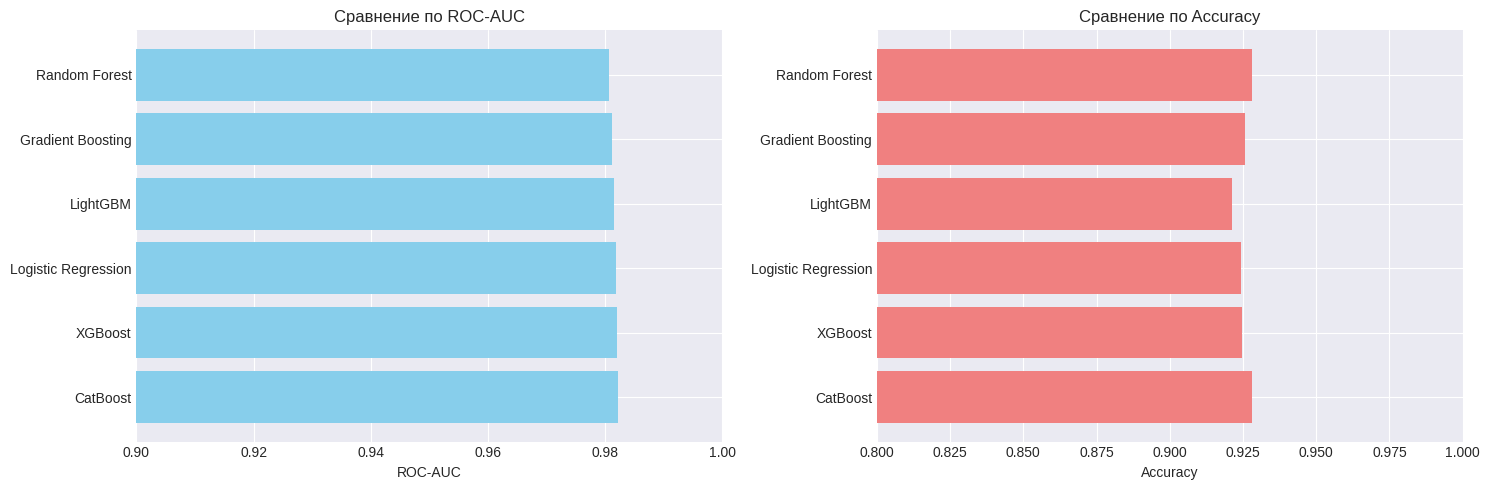


Лучшая модель: CatBoost (ROC-AUC: 0.9822)


In [119]:
# Сравнение всех моделей
results = pd.DataFrame({
    'Модель': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost'],
    'ROC-AUC': [roc_auc_log, roc_auc_rf, roc_auc_gb, roc_auc_xgb, roc_auc_lgbm, roc_auc_catboost],
    'Accuracy': [accuracy_log, accuracy_rf, accuracy_gb, accuracy_xgb, accuracy_lgbm, accuracy_catboost]
})

results = results.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print("=" * 70)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 70)
print(results.to_string(index=False))
print("=" * 70)

# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].barh(results['Модель'], results['ROC-AUC'], color='skyblue')
ax[0].set_xlabel('ROC-AUC')
ax[0].set_title('Сравнение по ROC-AUC')
ax[0].set_xlim([0.9, 1.0])

ax[1].barh(results['Модель'], results['Accuracy'], color='lightcoral')
ax[1].set_xlabel('Accuracy')
ax[1].set_title('Сравнение по Accuracy')
ax[1].set_xlim([0.8, 1.0])

plt.tight_layout()
plt.show()

print(f"\nЛучшая модель: {results.iloc[0]['Модель']} (ROC-AUC: {results.iloc[0]['ROC-AUC']:.4f})")

## 10. Оптимизация гиперпараметров

### 10.1 GridSearchCV

In [120]:
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_tr, y_tr)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Лучший ROC-AUC: 0.9837

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Лучший ROC-AUC: 0.9837


### 10.2 Optuna

In [121]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    """
    Целевая функция для оптимизации XGBoost
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_tr, y_tr, cv=3, scoring='roc_auc', n_jobs=-1)
    
    return scores.mean()

# Оптимизация
print("Оптимизация с Optuna...")

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("\n" + "=" * 70)
print("РЕЗУЛЬТАТЫ OPTUNA")
print("=" * 70)
print(f"Лучший ROC-AUC: {study.best_value:.4f}")
print(f"\nЛучшие параметры:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")
print("=" * 70)

# Обучение с лучшими параметрами
optuna_best_model = XGBClassifier(**study.best_params, random_state=42)
optuna_best_model.fit(X_tr, y_tr)

y_pred_optuna = optuna_best_model.predict(X_val)
y_pred_proba_optuna = optuna_best_model.predict_proba(X_val)[:, 1]

roc_auc_optuna = roc_auc_score(y_val, y_pred_proba_optuna)
accuracy_optuna = accuracy_score(y_val, y_pred_optuna)

print(f"\nМодель с Optuna - ROC-AUC: {roc_auc_optuna:.4f}, Accuracy: {accuracy_optuna:.4f}")

Оптимизация с Optuna...


Best trial: 11. Best value: 0.983538: 100%|██████████| 30/30 [00:22<00:00,  1.31it/s]




РЕЗУЛЬТАТЫ OPTUNA
Лучший ROC-AUC: 0.9835

Лучшие параметры:
  n_estimators: 257
  max_depth: 9
  learning_rate: 0.057325581409982077
  subsample: 0.7553553627263841
  colsample_bytree: 0.7173794051297722

Модель с Optuna - ROC-AUC: 0.9826, Accuracy: 0.9266

Модель с Optuna - ROC-AUC: 0.9826, Accuracy: 0.9266


## 11. Финальная оценка модели

ФИНАЛЬНАЯ МОДЕЛЬ
ROC-AUC: 0.9813
Accuracy: 0.9252
Precision: 0.9289
Recall: 0.9246
F1-Score: 0.9267

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1024
         1.0       0.93      0.92      0.93      1074

    accuracy                           0.93      2098
   macro avg       0.93      0.93      0.93      2098
weighted avg       0.93      0.93      0.93      2098



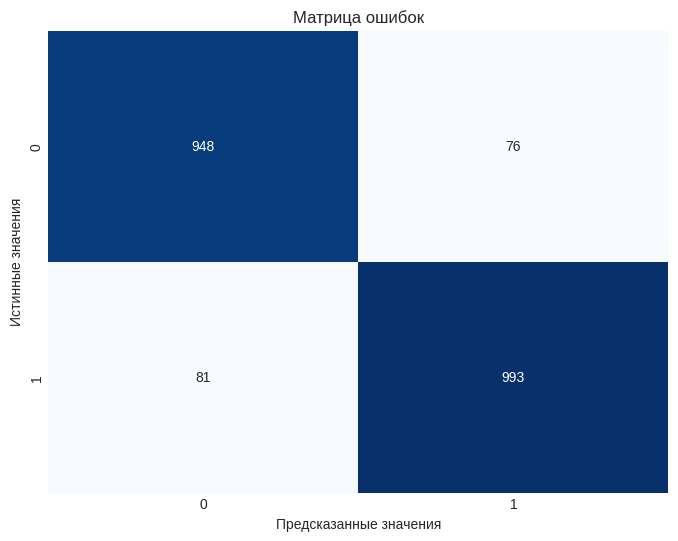

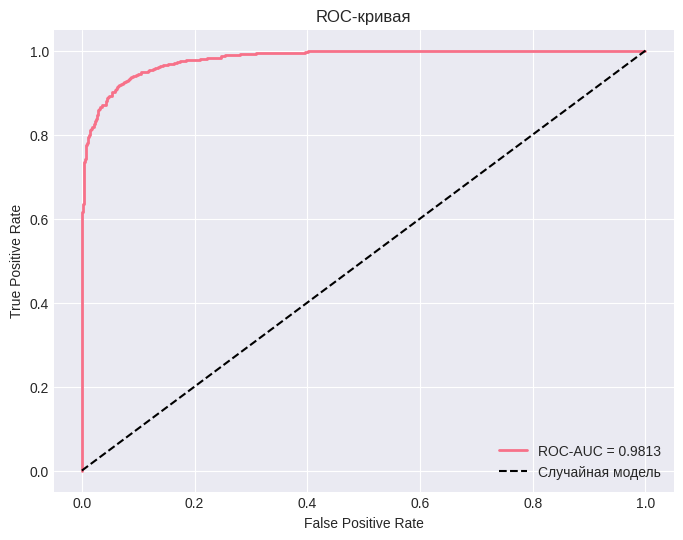

In [122]:
# Предсказания финальной модели
y_pred_final = best_model.predict(X_val)
y_pred_proba_final = best_model.predict_proba(X_val)[:, 1]

# Метрики
final_roc_auc = roc_auc_score(y_val, y_pred_proba_final)
final_accuracy = accuracy_score(y_val, y_pred_final)
final_precision = precision_score(y_val, y_pred_final)
final_recall = recall_score(y_val, y_pred_final)
final_f1 = f1_score(y_val, y_pred_final)

print("=" * 70)
print("ФИНАЛЬНАЯ МОДЕЛЬ")
print("=" * 70)
print(f"ROC-AUC: {final_roc_auc:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print("=" * 70)
print(f"\nClassification Report:")
print(classification_report(y_val, y_pred_final))

# Матрица ошибок
cm = confusion_matrix(y_val, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-AUC = {final_roc_auc:.4f}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()

## 12. Предсказания на тестовой выборке

In [123]:
# Обучение на всех данных
best_model.fit(X_train_scaled, y_train)

# Предсказания
test_predictions = best_model.predict(X_test_scaled)

print(f"Распределение предсказаний:")
print(pd.Series(test_predictions).value_counts())
print(f"\nПроцентное соотношение:")
print(pd.Series(test_predictions).value_counts(normalize=True) * 100)

Распределение предсказаний:
1    2590
0    2410
Name: count, dtype: int64

Процентное соотношение:
1    51.8
0    48.2
Name: proportion, dtype: float64


## 13. Создание submission файла

In [124]:
# Создание submission файла
submission = pd.DataFrame({
    'ID': test_ids,
    'LoanApproved': test_predictions
})

submission.to_csv('submission.csv', index=False)

print(f"Первые 10 строк:")
print(submission.head(10))
print(f"\nПоследние 10 строк:")
print(submission.tail(10))
print(f"\nВсего: {len(submission)}")

Первые 10 строк:
   ID  LoanApproved
0   0             1
1   1             0
2   2             1
3   3             1
4   4             1
5   5             0
6   6             1
7   7             1
8   8             1
9   9             0

Последние 10 строк:
        ID  LoanApproved
4990  4990             0
4991  4991             0
4992  4992             1
4993  4993             1
4994  4994             0
4995  4995             1
4996  4996             0
4997  4997             0
4998  4998             0
4999  4999             0

Всего: 5000
